In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import scikitplot as skplt

In [256]:
data = pd.read_csv('survey_data.csv')

In [257]:
data.head()
data = data.dropna()

I Set No problem: 1,
      Some problem: 2,
      Extreme problem: 3
      
Also, Not at all: 1,
      Several of days: 2,
      More than half the days: 3,
      Nearly every day: 4

In [258]:
change_value_dict = {'No problem':1, 'Some problems':2, 'Extreme problems':3, 'Not at all':1, 'Several of days':2, 
                     'More than half the days':3, 'Nearly every days':4}

data = data.replace({'Mobility': change_value_dict, 'Self_care': change_value_dict, 'Usual_activities': change_value_dict, 'Pain_and_discomfort': change_value_dict, 'Anxiety_and_depression': change_value_dict, 'Question_1': change_value_dict,'Question_2': change_value_dict,'Question_3': change_value_dict,'Question_4': change_value_dict,'Question_5': change_value_dict,'Question_6': change_value_dict,'Question_7': change_value_dict,'Question_8': change_value_dict,'Question_9': change_value_dict})

In [259]:
data.head()

,id,Mobility,Self_care,Usual_activities,Pain_and_discomfort,Anxiety_and_depression,Health,Question_1,Question_2,Question_3,Question_4,Question_5,Question_6,Question_7,Question_8,Question_9
0,230,1,1,1,1,1,90.0,1,1,2,1,1,1,1,1,1
1,232,1,1,1,1,1,90.0,1,1,1,1,1,1,1,1,1
2,476,1,1,1,1,1,100.0,1,1,1,1,1,1,1,1,1
3,478,1,2,1,1,1,50.0,1,1,1,1,1,1,1,1,1
4,486,2,1,1,2,2,70.0,1,2,2,2,2,1,1,1,1


In [260]:
dataX = data.loc[:, data.columns != 'Health']
dataX = dataX.drop(['id'], axis=1)
dataY = data['Health']

In [261]:
dataX

,Mobility,Self_care,Usual_activities,Pain_and_discomfort,Anxiety_and_depression,Question_1,Question_2,Question_3,Question_4,Question_5,Question_6,Question_7,Question_8,Question_9
0,1,1,1,1,1,1,1,2,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,2,1,1,1,1,1,1,1,1,1,1,1,1
4,2,1,1,2,2,1,2,2,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,1,1,1,1,1,1,1,1,1,1,1,1,1
65,2,1,1,1,2,4,3,1,3,1,1,1,1,1
66,1,1,1,2,1,2,1,1,3,2,1,2,1,1
67,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [262]:
X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=0)

In [263]:
X_test

,Mobility,Self_care,Usual_activities,Pain_and_discomfort,Anxiety_and_depression,Question_1,Question_2,Question_3,Question_4,Question_5,Question_6,Question_7,Question_8,Question_9
29,1,1,1,1,1,1,1,2,2,1,1,2,1,1
58,1,1,1,1,1,1,1,1,1,1,1,1,1,1
37,2,1,2,2,2,2,2,4,2,3,1,1,1,1
35,1,1,1,1,2,1,1,2,1,1,1,1,1,1
33,1,1,1,2,1,1,1,1,1,1,1,1,1,1
50,1,1,1,2,1,1,1,1,1,1,1,1,1,1
24,1,1,1,2,2,2,2,1,2,2,1,1,1,1
44,1,1,2,1,2,1,3,1,1,1,1,1,1,1
48,1,1,1,1,2,1,1,1,1,1,1,1,1,1
28,1,1,1,1,1,2,1,1,2,2,1,1,1,1


In [264]:
tree = DecisionTreeClassifier(min_samples_split=10)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [265]:
Y_predicted = tree.predict(X_test)
Y_predicted

array([60., 90., 60., 80., 70., 70., 50., 80., 80., 80., 70., 50., 50.,
       50., 50., 50., 50., 90., 80., 80., 70.])

In [300]:
dtc_best = tree.score(X_test, Y_test)
dtc_best

0.14285714285714285

In [267]:
confusion_matrix = confusion_matrix(Y_test, Y_predicted)

In [268]:
confusion_matrix

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 3, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

C:\Users\sclab\anaconda3\envs\dm\lib\site-packages\scikitplot\metrics.py:124: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


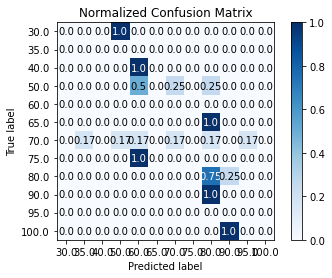

In [224]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_predicted,
                                    normalize=True)
plt.savefig('./confusion_matrix.png')
plt.show()

In [269]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [271]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [273]:
y_pred = model.predict(X_test)
y_pred

array([50., 90., 60., 80., 80., 80., 60., 60., 80., 80., 80., 60., 80.,
       70., 60., 70., 80., 90., 60., 80., 80.])

In [304]:
accuracy = accuracy_score(Y_test, y_pred)*100
nbc_best = accuracy
nbc_best

19.047619047619047

C:\Users\sclab\anaconda3\envs\dm\lib\site-packages\scikitplot\metrics.py:124: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


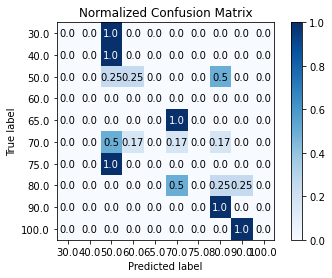

In [282]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_predicted,
                                    normalize=True)
plt.savefig('./confusion_matrix.png')
plt.show()

In [324]:
from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, Y_train)

In [325]:
model.predict_proba(X_train)

array([[9.67035888e-02, 2.40012144e-02, 1.15466749e-02, 4.86435519e-01,
        1.13623203e-01, 1.92193903e-02, 1.32310290e-01, 6.01460288e-03,
        4.93320045e-02, 2.70305083e-02, 8.25637138e-03, 2.55266331e-02],
       [3.13559795e-02, 2.29609469e-02, 3.59729189e-02, 1.43159691e-01,
        1.35189507e-01, 3.45959292e-02, 1.54365640e-01, 2.46739643e-02,
        1.73152732e-01, 1.75418225e-01, 3.24692439e-02, 3.66852223e-02],
       [2.87194180e-02, 9.06799875e-02, 1.75666485e-02, 6.00188454e-02,
        3.98964132e-01, 5.07622679e-03, 5.88989050e-02, 3.25009796e-02,
        2.74409722e-01, 1.37397472e-02, 9.76972737e-03, 9.65566145e-03],
       [3.13559795e-02, 2.29609469e-02, 3.59729189e-02, 1.43159691e-01,
        1.35189507e-01, 3.45959292e-02, 1.54365640e-01, 2.46739643e-02,
        1.73152732e-01, 1.75418225e-01, 3.24692439e-02, 3.66852223e-02],
       [3.13559795e-02, 2.29609469e-02, 3.59729189e-02, 1.43159691e-01,
        1.35189507e-01, 3.45959292e-02, 1.54365640e-01, 2.46

In [326]:
model.predict(X_train)

array([50., 90., 60., 90., 90., 80., 80., 50., 50., 80., 90., 60., 50.,
       80., 90., 50., 60., 60., 90., 60., 60., 50., 50., 70., 50., 80.,
       50., 50., 90., 80., 70., 90., 50., 50., 70., 80., 50., 80., 35.,
       50., 50., 60., 80., 50., 60., 80.])

In [327]:
lrc_best = model.score(X_train,Y_train)
lrc_best

0.5434782608695652

In [328]:
confusion_matrix(Y_train, model.predict(X_train))

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 2, 5, 0, 0, 0, 1, 2, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 6, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

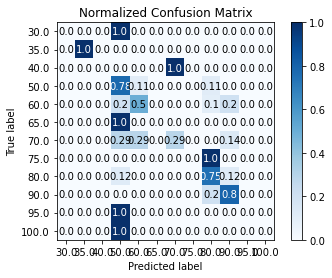

In [329]:
skplt.metrics.plot_confusion_matrix(Y_train, model.predict(X_train),
                                    normalize=True)
plt.savefig('./confusion_matrix.png')
plt.show()

In [330]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [333]:
votingC = VotingClassifier(estimators=[('dtc', tree), ('nbc', model), ('lrc', lmodel)], voting = 'hard')

votingC = votingC.fit(X_train, Y_train)

In [336]:
prediction = votingC.predict(X_train)

In [337]:
prediction

array([50., 90., 60., 90., 90., 80., 80., 50., 50., 80., 90., 60., 50.,
       80., 90., 50., 60., 60., 90., 60., 60., 50., 50., 70., 50., 80.,
       50., 50., 90., 80., 70., 90., 50., 50., 70., 80., 50., 80., 35.,
       50., 50., 60., 80., 50., 60., 80.])

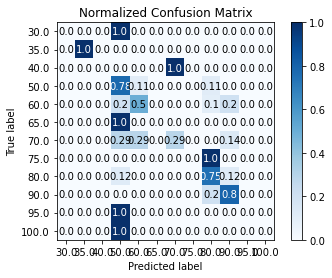

In [338]:
skplt.metrics.plot_confusion_matrix(Y_train, prediction,
                                    normalize=True)
plt.savefig('./confusion_matrix.png')
plt.show()